In [1]:
import torch
from model import Foundation
from PIL import Image
import torchvision
from tokenizer import Tokenizer
from matplotlib import pyplot as plt

In [2]:
BATCH_SIZE = 16
LEARNING_RATE = 3e-4
VOCAB_SIZE = 128
EMBD_SIZE = 512
NUM_HEADS = 32
NUM_BLOCKS = 16
DROPOUT = 0.2
IMG_SIZE = 256
NUM_WORKERS = 4
WARMUP_STEPS = 400


CSV_DIR = "/home/starsystem/Documents/SceneUnderstanding/models/"
MODEL_SAVE_DIR = "/home/starsystem/Documents/SceneUnderstanding/models/"
MODEL_SAVE_NAME = "Foundation.pt"
CSV_NAME = "Foundation.csv"

In [3]:
print(f"Using PyTorch version {torch.__version__}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
torch.set_float32_matmul_precision('high')
torch._dynamo.config.suppress_errors = True

Using PyTorch version 2.1.0.dev20230814+cu118
Using device cuda


In [4]:
totensor = torchvision.transforms.ToTensor()
tokenizer = Tokenizer()
tokenizer.load("tokenizer2.pkl")

In [5]:
# model = Foundation(num_blocks = NUM_BLOCKS,
#                    num_heads = NUM_HEADS, 
#                    unk_char = tokenizer.char_to_idx["[UNK]"],
#                    vocab_size=VOCAB_SIZE, 
#                    embd_size=EMBD_SIZE, 
#                    dropout = DROPOUT).to(device)
torch._dynamo.reset()
model = torch.load(MODEL_SAVE_DIR + MODEL_SAVE_NAME)
torch._dynamo.reset()

In [6]:
# model = torch.compile(model)

In [13]:
img_path = "/home/starsystem/Documents/SceneUnderstanding/dataset(coco)/train2014/COCO_train2014_000000000382.jpg"

raw_img = Image.open(img_path).resize((256, 256))
img = totensor(raw_img)
img = img.unsqueeze(0)
img = img/255.
img = img.to(device)
text = [tokenizer.char_to_idx["[START]"]]
text = torch.tensor(text).to(torch.int64).to(device)
# print(text.shape)

model.eval()
with torch.no_grad():
    i = 0
    while True:
        output = model((text.unsqueeze(0), img))
        output = output.argmax(dim = -1)
        text = torch.concat([text, output[-1][-1].unsqueeze(0)], dim = -1)
        # print(text)
        if output[0][-1] == tokenizer.char_to_idx["[END]"]:
            break
        i += 1
        # if i > 10:
            # break
print(tokenizer.decode(text[1:-1].tolist()))


A man standing in front of a table with a pizza on it.


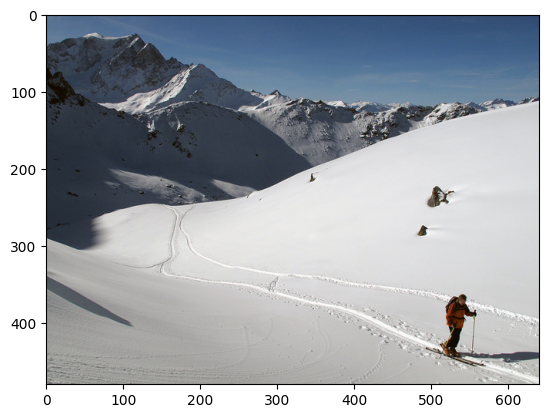

In [14]:
img = plt.imread(img_path)
plt.imshow(img)
plt.show()